In [1]:
import pandas as pd

In [60]:
items = [10, 8, 6, 4, 2]
stats = pd.DataFrame(columns=["avg", "std", "loss"],index=pd.Series(items, name="Delay"))
stats

,avg,std,loss
Delay,,,
10,NaN,NaN,NaN
8,NaN,NaN,NaN
6,NaN,NaN,NaN
4,NaN,NaN,NaN
2,NaN,NaN,NaN


In [55]:
def calc_loss(df):
    counts = df["receive_time"].value_counts()
    try:
        return counts[0]/len(df)
    except:
        return 0

In [79]:
avg = []
std = []
loss = []

for k in items:
    print(k)
    df = pd.read_csv(f"./data/tx_rx_data_{k}.csv")
    # display(df)
    _avg = df[df["difference"] > 0]["difference"].mean()
    _std  = df[df["difference"] > 0]["difference"].std()
    _loss = calc_loss(df)

    avg.append(_avg)
    std.append(_std)
    loss.append(_loss)

stats["avg"] = avg
stats["std"] = std
stats["loss"] = loss
stats

10
8
6
4
2


,avg,std,loss
Delay,,,
10,0.371667,0.042672,0.00
8,0.344929,0.013412,0.00
6,2.454254,1.404388,0.00
4,75.995217,38.109183,0.01
2,82.217910,38.981648,0.48


In [ ]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'timestamp on data arrival - timestamp on data sending')

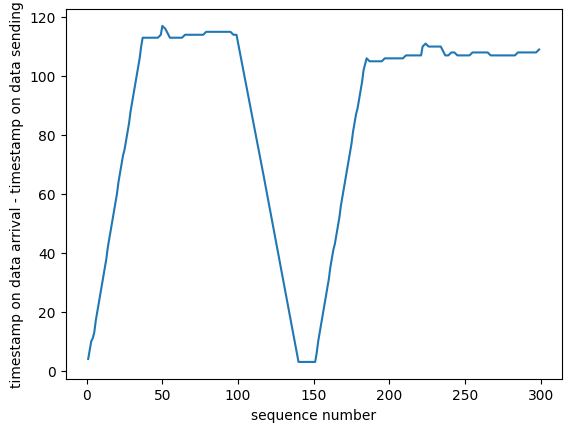

In [101]:
df = pd.read_csv(f"./data/tx_rx_data_3.csv")
temp = df[df['difference'] > 1]
plt.plot(temp['difference'])
plt.xlabel("sequence number")
plt.ylabel("timestamp on data arrival - timestamp on data sending")

Text(0, 0.5, 'timestamp on data arrival - timestamp on data sending')

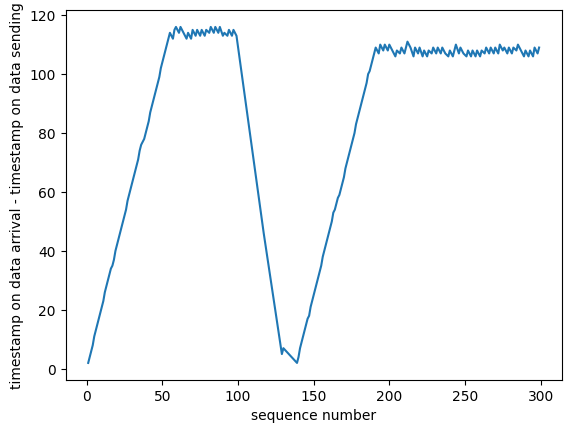

In [99]:
df = pd.read_csv(f"./data/tx_rx_data_3.csv")
temp = df[df['difference'] > 1]
plt.plot(temp['difference'])
plt.xlabel("sequence number")
plt.ylabel("timestamp on data arrival - timestamp on data sending")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./data/experiment data/log_randoms.csv")
anchor = df["generation time"][0]

df["generation time"] = df["generation time"] - anchor
df["receive time"] = df["receive time"] - anchor
df

,generation time,receive time,difference
0,0,145,145
1,180,335,155
2,420,582,162
3,600,746,146
4,780,947,167
5,1260,1384,124
6,1440,1608,168
7,1680,1829,149
8,2160,2295,135
9,2340,2479,139


In [4]:
df["difference"].std() # 60 secs

143.34483327999712

In [8]:
from plotly import graph_objects as go
from plotly import express as px

In [9]:
fig = go.Figure()

In [33]:
buffer = []
buffer_size = 5

In [34]:
def enque(item):
    global buffer, buffer_size

    if len(buffer) == buffer_size:
        print("Buffer Filled")
        buffer.pop()

    buffer.append(item)

In [35]:
for i in range(5):
    enque(5)

In [36]:
enque(0)

Buffer Filled


In [37]:
buffer

[5, 5, 5, 5, 0]

In [38]:
from numpy.random import poisson

In [39]:
random_delay = True
update_period = 60

def generate_delay(lmb=2.5):
    global random_delay, update_period

    if random_delay:
        return (poisson(2.5, 1)[0] + 1) * 60
    
    return update_period

In [91]:
generate_delay()

240